<a href="https://colab.research.google.com/github/renaldoaluska/pba2025gasal/blob/main/PBA_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5026221144

Alfa Renaldo Aluska

PBA GASAL 2025

# INITIAL REQUIREMENTS
WEEK 2: Data Scrapping Application (1), Data Preprocessing Application: Frequent Word Analysis (2) Bertokenizer (Stopword removal/ Stopword customs (WEEK2 RECAP) (3)

In [12]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

# DATA SCRAPPING

## GPlay Scrapper

In [13]:
#Android App TransJogja  from Google Play at
#https://play.google.com/store/apps/details?id=ngi.transjogja.apppublic&hl=id
#ID Apps:
#The apps ID found in the link after id=ngi.transjogja.apppublic

from google_play_scraper import app, Sort, reviews_all

transjog_reviews = reviews_all(
    'ngi.transjogja.apppublic',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [14]:
transjog_reviews[:3]

[{'reviewId': '509d3535-63e4-47b3-9ff4-a3d8f6edde70',
  'userName': 'Evan Arka',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjWdDOa6AvOjN9UFwQFpbr1zaqTYZNCMeJPmOCsCYpDG6aS6gCOd',
  'content': 'aplikasi berguna, tapi terkadang error',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.7',
  'at': datetime.datetime(2025, 10, 11, 10, 45, 51),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.7'},
 {'reviewId': '036ad8cb-17e3-42bb-8632-e052797b1c0e',
  'userName': 'Urdha Taruwara',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVGsUNSPnOGUXjKL0DsMZpwYIu8noP2XWjsmrRbn7ENd81V34uV',
  'content': 'membantu pulang sekolah dan menghemat uang👍',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.3.7',
  'at': datetime.datetime(2025, 10, 10, 12, 1, 18),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.3.7'},
 {'reviewId': '227092a9-16bb-475b-9988-7b95f44a9fe4',
  'userName': 'Dwias Anandita',
  'userImag

## Ethics: sensor userName

In [15]:
# Lakukan iterasi dan ubah 'userName'
# Ini adalah cara yang paling efisien menggunakan list comprehension
reviews_tersensor = [
    {**review, 'userName': 'Pengguna Google'} for review in transjog_reviews
]

# Sekarang, 'reviews_tersensor' berisi data yang sama,
# tapi semua nama pengguna sudah diubah.

# Mari kita lihat perbedaannya
if transjog_reviews:
    print("--- DATA ASLI ---")
    print(f"Username: {transjog_reviews[0]['userName']}")
    print(f"Review: {transjog_reviews[0]['content']}\n")

if reviews_tersensor:
    print("--- DATA SETELAH DISENSOR ---")
    print(f"Username: {reviews_tersensor[0]['userName']}")
    print(f"Review: {reviews_tersensor[0]['content']}")

--- DATA ASLI ---
Username: Evan Arka
Review: aplikasi berguna, tapi terkadang error

--- DATA SETELAH DISENSOR ---
Username: Pengguna Google
Review: aplikasi berguna, tapi terkadang error


## Into dataframe

In [16]:
#Save TransJogja reviews into dataframe
df_transjog = pd.DataFrame(np.array(reviews_tersensor),columns=['content'])
df_transjog = df_transjog.join(pd.DataFrame(df_transjog.pop('content').tolist()))
df_transjog

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,509d3535-63e4-47b3-9ff4-a3d8f6edde70,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjWdDOa6AvOjN9UFwQFpbr1zaqTYZNCMeJPmOCsCYpDG6aS6gCOd,"aplikasi berguna, tapi terkadang error",5,0,2.3.7,2025-10-11 10:45:51,None,NaT,2.3.7
1,036ad8cb-17e3-42bb-8632-e052797b1c0e,Pengguna Google,https://play-lh.googleusercontent.com/a-/ALV-UjVGsUNSPnOGUXjKL0DsMZpwYIu8noP2XWjsmrRbn7ENd81V34uV,membantu pulang sekolah dan menghemat uang👍,5,0,2.3.7,2025-10-10 12:01:18,None,NaT,2.3.7
2,227092a9-16bb-475b-9988-7b95f44a9fe4,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJze5GdyBK1R3INtU8MMaHJoWZcVevWXawdcAkuc3thOx5ojw=mo,"aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli eTiket secara online. semoga update selanjutnya bisa men...",5,0,None,2025-10-10 06:50:15,None,NaT,None
3,133de1db-1700-4d77-8340-665f2f056125,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJmvBhx8Lb1L0lYHaKdV158pypVWVKgE8LEyE2mlDtkaBUMgA=mo,oke,5,0,2.3.7,2025-10-06 03:28:55,None,NaT,2.3.7
4,2412c1af-ad3b-4e5e-aa99-bf4814480823,Pengguna Google,https://play-lh.googleusercontent.com/a/ACg8ocJYND8PrhN9ny8xoR3CG2xmddOUvVjCVGvwGljKakPceV--Lkg=mo,bagus👍,5,0,2.3.5,2025-10-01 13:13:57,None,NaT,2.3.5
...,...,...,...,...,...,...,...,...,...,...,...
339,27d478d3-67b9-4fa6-99ca-1f779a50d042,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Work banget sih, wajar laah kalo banyak kendala, masi baru jugak... Semangat dan kembangkan!",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10,1.0
340,2c7359e3-c29b-4f75-8b8f-fd4c69715d60,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT,None
341,9fa31a1c-3c49-4bad-ad30-2203d9be5c02,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Install >> lihat instruksi >> harus login ? >> Uninstall,5,1,None,2020-01-30 08:57:06,None,NaT,None
342,83d95da2-316a-4bc2-b113-42d27b3c0663,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT,1.0


## Simpan csv raw

In [17]:

df_transjog.to_csv(r'df_transjog_raw.csv', index=False)

In [18]:
df_transjog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              344 non-null    object        
 1   userName              344 non-null    object        
 2   userImage             344 non-null    object        
 3   content               344 non-null    object        
 4   score                 344 non-null    int64         
 5   thumbsUpCount         344 non-null    int64         
 6   reviewCreatedVersion  273 non-null    object        
 7   at                    344 non-null    datetime64[ns]
 8   replyContent          13 non-null     object        
 9   repliedAt             13 non-null     datetime64[ns]
 10  appVersion            273 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 29.7+ KB


## Loc yang perlu saja

In [19]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
#df_analysis = df_transjog.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]
df_transjog.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,"aplikasi berguna, tapi terkadang error",5,0,2.3.7,2025-10-11 10:45:51,None,NaT
1,membantu pulang sekolah dan menghemat uang👍,5,0,2.3.7,2025-10-10 12:01:18,None,NaT
2,"aplikasinya ringan tapi sebaiknya metode pembayaran dilengkapi dg adanya transfer bank, gopay, dana, ovo dll sehingga memudahkan untuk beli eTiket secara online. semoga update selanjutnya bisa men...",5,0,None,2025-10-10 06:50:15,None,NaT
3,oke,5,0,2.3.7,2025-10-06 03:28:55,None,NaT
4,bagus👍,5,0,2.3.5,2025-10-01 13:13:57,None,NaT
...,...,...,...,...,...,...,...
339,"Work banget sih, wajar laah kalo banyak kendala, masi baru jugak... Semangat dan kembangkan!",5,0,1.0,2020-01-31 11:23:42,terima kasih kak.,2020-06-25 05:54:10
340,Inovasi pelayanan,5,0,None,2020-01-30 12:38:28,None,NaT
341,Install >> lihat instruksi >> harus login ? >> Uninstall,5,1,None,2020-01-30 08:57:06,None,NaT
342,Update tji,4,1,1.0,2020-01-29 15:26:20,None,NaT


## Cek score (rating)

In [20]:
#Check number of reviews scores
df_transjog['score'].value_counts()

,count
score,
5,173
1,68
4,39
3,34
2,30


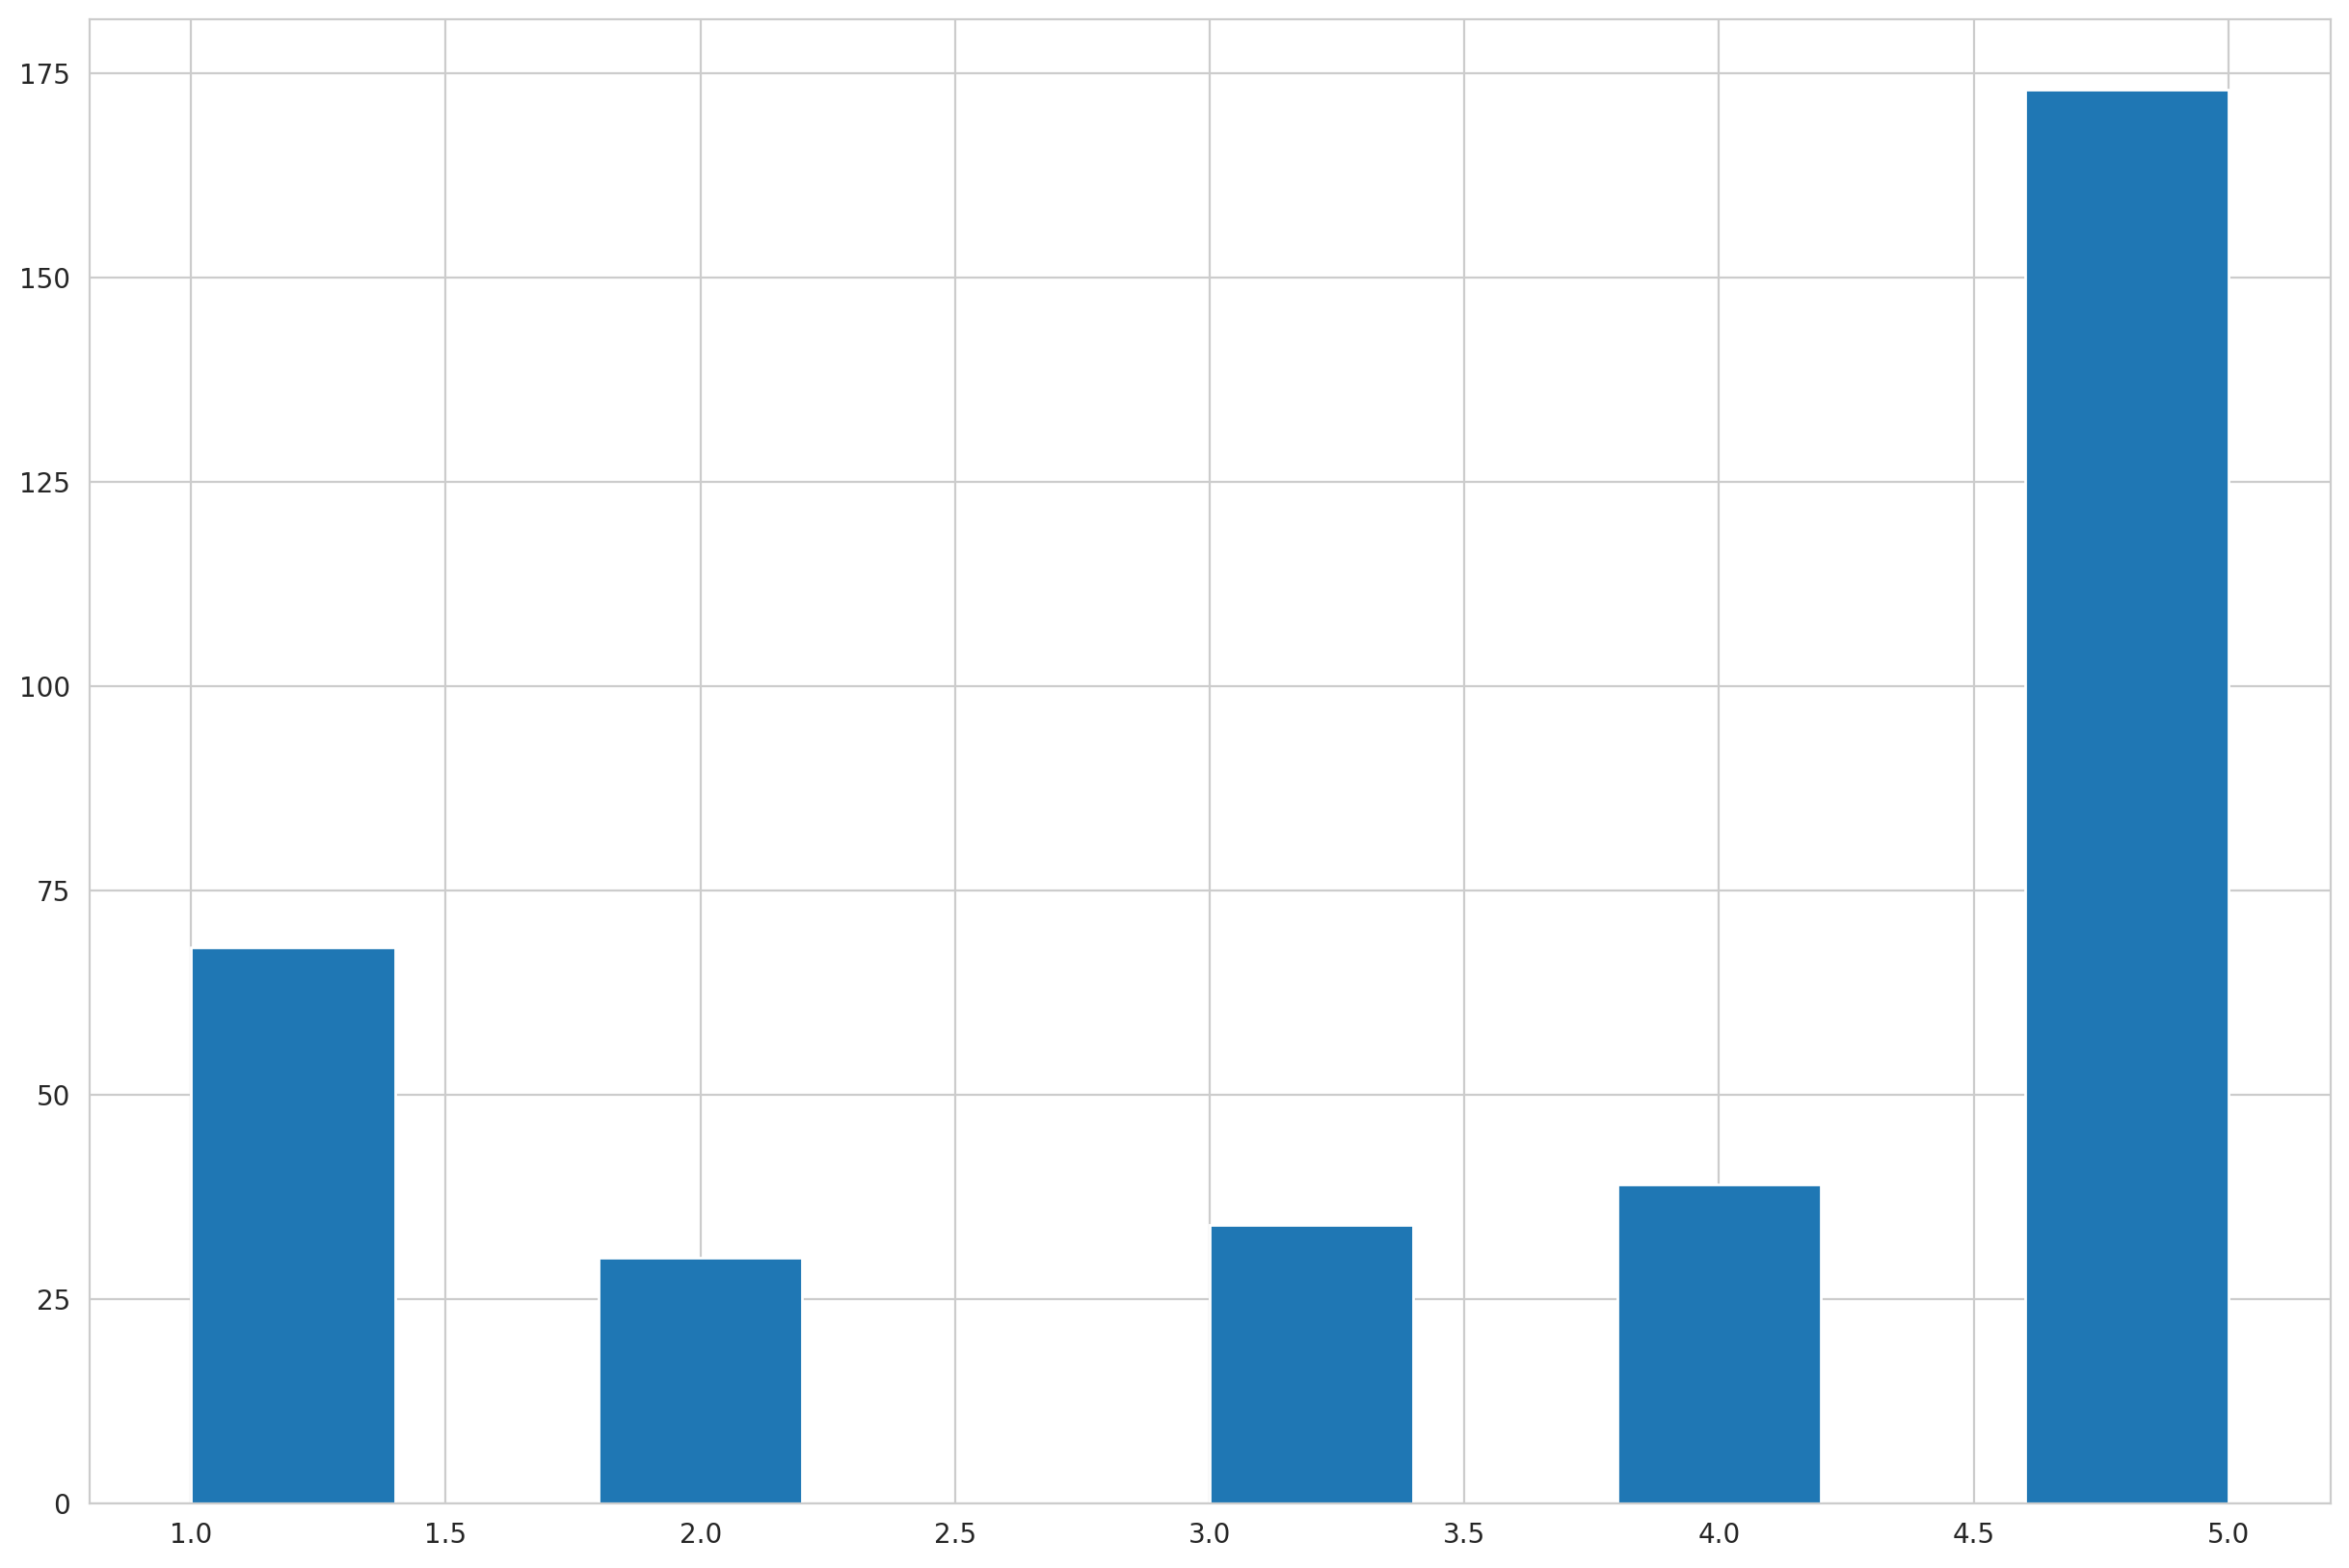

In [21]:
plt.hist(df_transjog['score'])
plt.show()